In [1]:
# Importing necessary files
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold 
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection,preprocessing, neighbors,metrics
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import testing,training
import os
import numpy as np

In [2]:
train_X =[]
test_X =[]
train_y =[]
test_y =[]
max_neighbors =25

# creating a np array for dtc-->Decision tree classifier and knn .
acc_dtc = np.array([])
acc_knn = np.array([])
acc_knn = acc_knn.astype('float64')

# creating directory for dtc knn and accuracy
os.mkdir('dtc')
os.mkdir('knn')
os.mkdir('accuracy')
os.mkdir('train_csv')
os.mkdir('test_csv')



df = pd.read_table(r"iris.data", sep=",", header=None, names=['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'class'])
df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Converted the last label as classes
df['class'] = pd.Categorical(df['class'])
df['class'] = df['class'].cat.codes

In [4]:
# k-fold cross validation
cv = model_selection.KFold(n_splits=5)

In [5]:
# creating target label and features
X = df[df.columns[:-1]].values
y = df['class'].values

In [6]:
# Shuffling the X and y before splitting
X, y = shuffle(X, y, random_state = 999)

In [7]:
# Spitting the test set into 5 cross valdiation 
for i, j in cv.split(df):
    train_X.append(X[i])
    test_X.append(X[j])
    train_y.append(y[i])
    test_y.append(y[j])

In [8]:
# converting in np array with dimensions as printed
train_X = np.asarray(train_X)
test_X = np.asarray(test_X)
train_y = np.asarray(train_y)
test_y = np.asarray(test_y)
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

for i in range(0,5):
    np.savetxt("train_csv/train_X_"+str(i)+".csv", train_X[i], delimiter=",")
    np.savetxt("train_csv/train_y_"+str(i)+".csv", train_y[i], delimiter=",")    
    np.savetxt("test_csv/test_X_"+str(i)+".csv", test_X[i], delimiter=",")    
    np.savetxt("test_csv/test_y_"+str(i)+".csv", test_y[i], delimiter=",")    

(5, 120, 4)
(5, 120)
(5, 30, 4)
(5, 30)


In [9]:
for i in range(5):
#     This function is used to train and save model for dtc in txt format in dtc directory
    training.create_dtc(i)

#     This function is used to train and save model for knn for different values of k in txt format in knn directory
    training.create_knn(i,max_neighbors)      

#     Loads model from txt ,prints accuracy in txt and returns accuracy to take average for dtc
    a = testing.run_dtc(i)
    print(a)
    acc_dtc = np.append(acc_dtc,a)
    
#     Loads model from txt ,prints accuracy in txt and returns accuracy to take average for knn
    b = testing.run_knn(i,max_neighbors)
    print(b)
    acc_knn = np.append(acc_knn,b)      

0.9333333333333333
[0.93333333 0.93333333 0.93333333 0.93333333 0.96666667 0.96666667
 0.96666667 0.96666667 0.96666667 0.9        0.9        0.9
 0.9        0.9        0.9        0.9        0.9        0.9
 0.9        0.9        0.9        0.93333333 0.93333333 0.93333333
 0.9       ]
0.9666666666666667
[1.         0.96666667 1.         1.         1.         0.96666667
 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333
 0.96666667 0.93333333 0.93333333 0.93333333 0.93333333 0.9
 0.96666667]
1.0
[0.96666667 1.         0.96666667 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
0.9
[0.93333333 0.93333333 0.93333333 0.96666667 0.93333333 0.96666667
 0.96666667 0.96666667 0.93333333 0.96666667 0.93333333 0.96666667
 0.96666667 0.96666667 0.96666

In [10]:
# reshaping in a matrix
acc_knn = acc_knn.reshape(int(max_neighbors/5),max_neighbors)

# average mean of k= 0-max_neighbours for all 5 fold cross sets
mean_knn_accuracy = np.mean(acc_knn,axis=0)

In [11]:
# Mean of dtc accuracies
# ** Accuracy may differ due to shuffling **
np.mean(acc_dtc)

0.9533333333333334

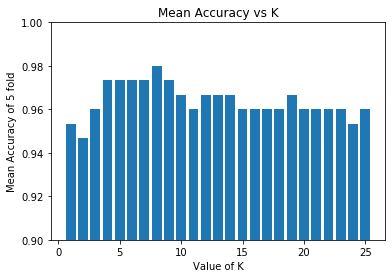

In [12]:
plt.bar([i+1 for i in range(0,max_neighbors)], mean_knn_accuracy)
plt.ylim([0.9,1])
plt.xlabel("Value of K")
plt.ylabel("Mean Accuracy of 5 fold")
plt.title("Mean Accuracy vs K")
plt.show()

We can see that average mean accuracy is greatest for k=8 i.e. mean_knn_accuracy[7]
So this is the best k

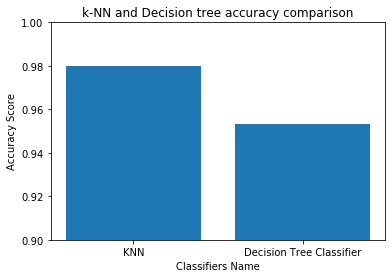

In [13]:
Classifier = ('KNN', 'Decision Tree Classifier')
y_pos = np.arange(len(Classifier))
plt.bar(np.arange(2), [mean_knn_accuracy[7], np.mean(acc_dtc)])
plt.ylim([0.9,1])
plt.title("k-NN and Decision tree accuracy comparison")
plt.ylabel("Accuracy Score")
plt.xlabel("Classifiers Name")
plt.xticks(y_pos, Classifier)
plt.show()

We can observe that the knn performs better for k=7 than decision tree classifier. The more accurate result of knn from decision tree classifier may be because of smaller training dataset.

It also helps to create non linear decision boundaries whereas decision tree classifier tends to create linear boundaries.
Knn is a lazy learner and mainly non-deterministic so it tends to not overfit the data and simply calculates the distances

Also decision tree tend to perform poorly for continuous values as well.
For the decision tree, the high classification error rate while training set is small in comparison with the number of classes

The code and the data can be found at https://github.com/sidmal11/ml/tree/master/Assign5